# UKHSA Cases Data Cleaning and Preprocessing
## 1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the data to dataframes

In [2]:
csv_filepaths = [
    r'../4_integrated_csv_files/ukhsa_cases_data/newReinfectionsBySpecimenDateAgeDemographics_region.csv',

    r'../4_integrated_csv_files/ukhsa_cases_data/newFirstEpisodesBySpecimenDateAgeDemographics_region.csv',
    
    r'../4_integrated_csv_files/ukhsa_cases_data/newFirstEpisodesBySpecimenDate_region.csv',
    
    r'../4_integrated_csv_files/ukhsa_cases_data/newCasesPCROnlyBySpecimenDate_region.csv',
    
    r'../4_integrated_csv_files/ukhsa_cases_data/newCasesLFDOnlyBySpecimenDate_region.csv',
    
    r'../4_integrated_csv_files/ukhsa_cases_data/newCasesLFDConfirmedPCRBySpecimenDate_region.csv',
    
    r'../4_integrated_csv_files/ukhsa_cases_data/newCasesBySpecimenDateRollingRate_region.csv',
    
    r'../4_integrated_csv_files/ukhsa_cases_data/newCasesBySpecimenDate_region.csv',
    
    r'../4_integrated_csv_files/ukhsa_cases_data/newCasesByPublishDateRollingRate_region.csv'
]

### I first load the csv files to a list of dataframes 

In [3]:
csv_dataframes = []

for filepath in csv_filepaths:
    df_for_cleaning = pd.read_csv(filepath)
    csv_dataframes.append(df_for_cleaning)

### The columns appear the same with similarly formatted data within I believe the dataframes should be suitable to merge I will check all the columns are consistent first:

In [4]:
reference_columns = csv_dataframes[0].columns
reference_columns

Index(['date', 'area_type', 'area_code', 'area_name', 'metric', 'metric_name',
       'value'],
      dtype='object')

In [5]:
for i, dataframe in enumerate(csv_dataframes[1:]):    
    try:
        if (dataframe.columns == reference_columns).all():
            print(f"{dataframe.metric_name[0]} is consistent with base dataframe and able to be merged.")
            
    except ValueError:
            print(f"{dataframe.metric_name[0]} is not consistent and can't be merged.")

New first episodes by specimen date age demographics is consistent with base dataframe and able to be merged.
New first episodes by specimen date is consistent with base dataframe and able to be merged.
New cases PCR only by specimen date is consistent with base dataframe and able to be merged.
New cases LFD only by specimen date is consistent with base dataframe and able to be merged.
New cases LFD confirmed by PCR by specimen date is consistent with base dataframe and able to be merged.
New cases rolling rate by specimen date is consistent with base dataframe and able to be merged.
New cases by specimen date is consistent with base dataframe and able to be merged.
New cases by publish date rolling rate is consistent with base dataframe and able to be merged.


### Reviewing the heads of the dataframes to see if the merge would preserve their integrity prior to cleaning
#### As you can see the datasets have the same columns and preserve their metric so would be suitable for merging

In [6]:
for dataframe in csv_dataframes:
    print("Dataframe Metric:")
    print(dataframe.metric_name[0], ":")
    print()
    print("Dataframe Head:")
    print(dataframe.head())
    print()
    print("Dataframe Tail:")
    print(dataframe.tail())
    print()
    print("Dataframe Shape: ")
    print(dataframe.shape)
    print()

Dataframe Metric:
New possible reinfections by specimen date age demographics :

Dataframe Head:
         date area_type  area_code        area_name  \
0  2023-01-01    region  E12000006  East of England   
1  2023-01-01    region  E12000006  East of England   
2  2023-01-01    region  E12000006  East of England   
3  2023-01-01    region  E12000006  East of England   
4  2023-01-01    region  E12000006  East of England   

                                         metric  \
0  newReinfectionsBySpecimenDateAgeDemographics   
1  newReinfectionsBySpecimenDateAgeDemographics   
2  newReinfectionsBySpecimenDateAgeDemographics   
3  newReinfectionsBySpecimenDateAgeDemographics   
4  newReinfectionsBySpecimenDateAgeDemographics   

                                         metric_name  value  
0  New possible reinfections by specimen date age...    NaN  
1  New possible reinfections by specimen date age...    NaN  
2  New possible reinfections by specimen date age...    NaN  
3  New possible r

### From the above visual inspection I am concerned that some of the csv files have metrics with no values
#### I am concerned that 'New possible reinfections by specimen date age demographics' and 'New first episodes by specimen date age demographics' I check this before merging my datasets:


In [7]:
csv_dataframes[0].describe()

,value
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [8]:
csv_dataframes[1].describe()

,value
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [9]:
csv_dataframes.pop(1)

,date,area_type,area_code,area_name,metric,metric_name,value
0,2021-01-01,region,E12000006,East of England,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
1,2021-01-01,region,E12000006,East of England,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
2,2021-01-01,region,E12000006,East of England,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
3,2021-01-01,region,E12000006,East of England,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
4,2021-01-01,region,E12000006,East of England,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
...,...,...,...,...,...,...,...
254425,2023-12-07,region,E12000005,West Midlands,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
254426,2023-12-07,region,E12000005,West Midlands,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
254427,2023-12-07,region,E12000005,West Midlands,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN
254428,2023-12-07,region,E12000005,West Midlands,newFirstEpisodesBySpecimenDateAgeDemographics,New first episodes by specimen date age demogr...,NaN


In [10]:
csv_dataframes.pop(0)

,date,area_type,area_code,area_name,metric,metric_name,value
0,2023-01-01,region,E12000006,East of England,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
1,2023-01-01,region,E12000006,East of England,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
2,2023-01-01,region,E12000006,East of England,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
3,2023-01-01,region,E12000006,East of England,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
4,2023-01-01,region,E12000006,East of England,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
...,...,...,...,...,...,...,...
254425,2021-12-31,region,E12000001,North East,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
254426,2021-12-31,region,E12000001,North East,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
254427,2021-12-31,region,E12000001,North East,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN
254428,2021-12-31,region,E12000001,North East,newReinfectionsBySpecimenDateAgeDemographics,New possible reinfections by specimen date age...,NaN


### As you can see all of these dataframes do not contain any values in therefore will not be used in the dataset.

In [11]:
for i, dataframe in enumerate(csv_dataframes):
    metric = dataframe.metric_name.values[-1]
    csv_dataframes[i] = dataframe.rename(columns={'value': metric.lower().replace(' ', '_')})
    csv_dataframes[i].drop(['metric_name', 'metric'], axis=1, inplace=True)

In [12]:
merged_cases_dataframe = csv_dataframes[0]

In [13]:
for i, dataframe in enumerate(csv_dataframes[:-1]):
    merged_cases_dataframe = pd.merge(
        merged_cases_dataframe, csv_dataframes[i+1], 
        on=['date', 'area_code', 'area_name', 'area_type'], 
        how='outer')

In [14]:
merged_cases_dataframe

,date,area_type,area_code,area_name,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
0,2020-06-01,region,E12000001,North East,69.0,69.0,NaN,NaN,18.7,69.0,11.6
1,2020-06-01,region,E12000002,North West,266.0,266.0,NaN,NaN,26.5,266.0,9.7
2,2020-06-01,region,E12000003,Yorkshire and The Humber,191.0,191.0,NaN,NaN,27.0,191.0,7.8
3,2020-06-01,region,E12000004,East Midlands,218.0,218.0,NaN,NaN,25.2,218.0,6.2
4,2020-06-01,region,E12000005,West Midlands,123.0,123.0,NaN,NaN,16.3,123.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...
11623,2023-12-14,region,E12000005,West Midlands,NaN,NaN,NaN,NaN,NaN,NaN,10.0
11624,2023-12-14,region,E12000006,East of England,NaN,NaN,NaN,NaN,NaN,NaN,12.7
11625,2023-12-14,region,E12000007,London,NaN,NaN,NaN,NaN,NaN,NaN,11.4
11626,2023-12-14,region,E12000008,South East,NaN,NaN,NaN,NaN,NaN,NaN,13.4


## 3. Exploring and Understanding the Data
### I first use the .info() method to describe both tables, as you can see the demographics dataframe is considerably more comprehensive, in addition there are some clear areas which will need to be addressed (incorrect data types and missing data)

In [15]:
merged_cases_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11628 entries, 0 to 11627
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   date                                             11628 non-null  object 
 1   area_type                                        11628 non-null  object 
 2   area_code                                        11628 non-null  object 
 3   area_name                                        11628 non-null  object 
 4   new_first_episodes_by_specimen_date              11610 non-null  float64
 5   new_cases_pcr_only_by_specimen_date              11610 non-null  float64
 6   new_cases_lfd_only_by_specimen_date              10150 non-null  float64
 7   new_cases_lfd_confirmed_by_pcr_by_specimen_date  10127 non-null  float64
 8   new_cases_rolling_rate_by_specimen_date          11583 non-null  float64
 9   new_cases_by_specimen_date  

#### This is a convenient format however I believe that the area_type column is filled with 'region' I will confirm this and drop it if so


In [16]:
merged_cases_dataframe['area_type'].nunique() 

1

In [17]:
merged_cases_dataframe.drop(['area_type'], axis=1, inplace=True)

#### I will also drop the area_code as this is represented by the area name

In [18]:
merged_cases_dataframe.drop(['area_code'], axis=1, inplace=True)

In [19]:
merged_cases_dataframe

,date,area_name,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
0,2020-06-01,North East,69.0,69.0,NaN,NaN,18.7,69.0,11.6
1,2020-06-01,North West,266.0,266.0,NaN,NaN,26.5,266.0,9.7
2,2020-06-01,Yorkshire and The Humber,191.0,191.0,NaN,NaN,27.0,191.0,7.8
3,2020-06-01,East Midlands,218.0,218.0,NaN,NaN,25.2,218.0,6.2
4,2020-06-01,West Midlands,123.0,123.0,NaN,NaN,16.3,123.0,5.2
...,...,...,...,...,...,...,...,...,...
11623,2023-12-14,West Midlands,NaN,NaN,NaN,NaN,NaN,NaN,10.0
11624,2023-12-14,East of England,NaN,NaN,NaN,NaN,NaN,NaN,12.7
11625,2023-12-14,London,NaN,NaN,NaN,NaN,NaN,NaN,11.4
11626,2023-12-14,South East,NaN,NaN,NaN,NaN,NaN,NaN,13.4


In [20]:
# Checking the shape of the dataframe
merged_cases_dataframe.shape

(11628, 9)

### I have a look at the head, tail and sample of the data to get a feel for the cleaned, combined data.


In [21]:
# Checking the top rows of the dataframe
merged_cases_dataframe.head(30)

,date,area_name,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
0,2020-06-01,North East,69.0,69.0,NaN,NaN,18.7,69.0,11.6
1,2020-06-01,North West,266.0,266.0,NaN,NaN,26.5,266.0,9.7
2,2020-06-01,Yorkshire and The Humber,191.0,191.0,NaN,NaN,27.0,191.0,7.8
3,2020-06-01,East Midlands,218.0,218.0,NaN,NaN,25.2,218.0,6.2
4,2020-06-01,West Midlands,123.0,123.0,NaN,NaN,16.3,123.0,5.2
5,2020-06-01,East of England,139.0,139.0,NaN,NaN,14.5,139.0,7.4
6,2020-06-01,London,50.0,50.0,NaN,NaN,4.5,50.0,1.9
7,2020-06-01,South East,185.0,185.0,NaN,NaN,13.1,185.0,5.0
8,2020-06-01,South West,52.0,52.0,NaN,NaN,9.6,52.0,2.3
9,2020-06-02,North East,59.0,59.0,NaN,NaN,17.1,59.0,11.7


In [22]:
# Checking the ending rows of the dataframe
merged_cases_dataframe.tail()

,date,area_name,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
11623,2023-12-14,West Midlands,NaN,NaN,NaN,NaN,NaN,NaN,10.0
11624,2023-12-14,East of England,NaN,NaN,NaN,NaN,NaN,NaN,12.7
11625,2023-12-14,London,NaN,NaN,NaN,NaN,NaN,NaN,11.4
11626,2023-12-14,South East,NaN,NaN,NaN,NaN,NaN,NaN,13.4
11627,2023-12-14,South West,NaN,NaN,NaN,NaN,NaN,NaN,10.8


In [23]:
# Random Sample of the dataframe
merged_cases_dataframe.sample(5)

,date,area_name,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
8303,2022-12-10,East of England,229.0,85.0,259.0,2.0,50.4,346.0,46.2
5365,2022-01-18,North West,10922.0,5855.0,5273.0,1202.0,1069.0,12330.0,1089.0
4115,2021-09-01,Yorkshire and The Humber,3361.0,2777.0,108.0,519.0,365.5,3404.0,337.5
8736,2023-01-27,London,154.0,120.0,119.0,2.0,17.7,241.0,15.5
9955,2023-06-12,North West,58.0,41.0,46.0,0.0,6.5,87.0,64.6


In [24]:
# Check for missing values
merged_cases_dataframe.isnull().sum()

date                                                  0
area_name                                             0
new_first_episodes_by_specimen_date                  18
new_cases_pcr_only_by_specimen_date                  18
new_cases_lfd_only_by_specimen_date                1478
new_cases_lfd_confirmed_by_pcr_by_specimen_date    1501
new_cases_rolling_rate_by_specimen_date              45
new_cases_by_specimen_date                           18
new_cases_by_publish_date_rolling_rate                0
dtype: int64

### The information seems appropriate as some of the metrics only span a certain amount of time e.g. testing by lfd only was introduced later as well as lfd comfirmed by pcr and the rolling rate will be an average over a set amount of time, therefore it may not be in each column

## 4. Handling Missing Data
### I first plot a heatmap to visualise the missing data before handling it

<Axes: >

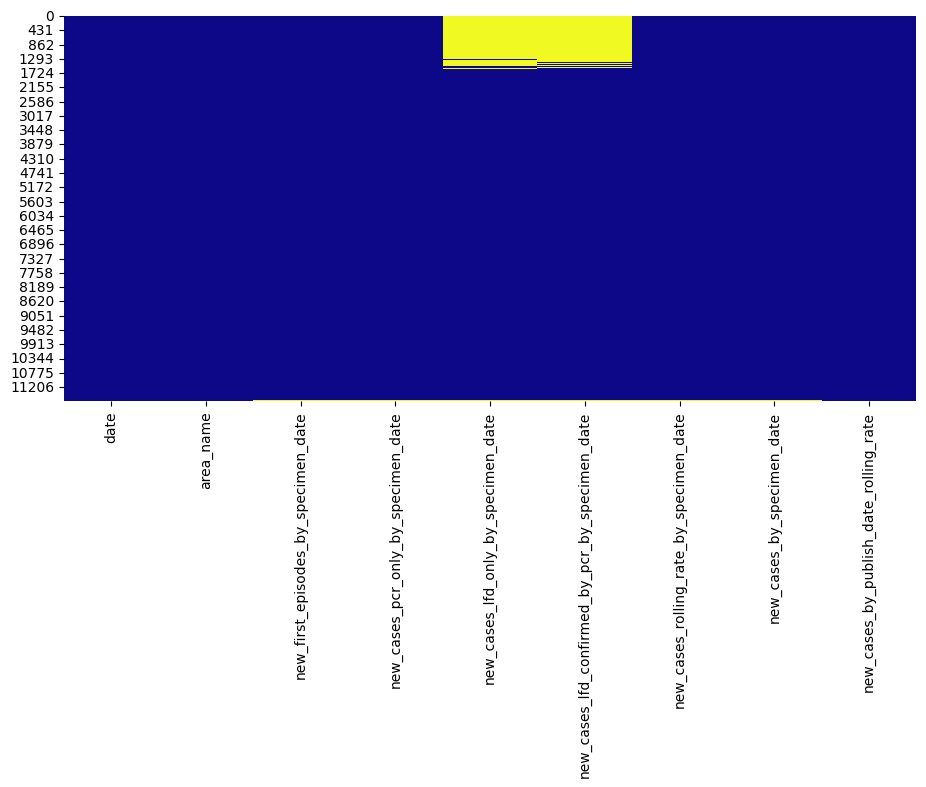

In [25]:
plt.figure(figsize=(11, 5))
sns.heatmap(merged_cases_dataframe.isnull(), cbar=False, cmap='plasma')

### This data appears to have only a few gaps for the new_cases_lfd_only_by_specimine_date and new_cases_lfd_confirmed_by_pcr_by_specemin_date

#### I first check to see which columns still contain na values:

In [26]:
columns_with_na_values = merged_cases_dataframe.columns[merged_cases_dataframe.isna().any()].tolist()
columns_with_na_values

['new_first_episodes_by_specimen_date',
 'new_cases_pcr_only_by_specimen_date',
 'new_cases_lfd_only_by_specimen_date',
 'new_cases_lfd_confirmed_by_pcr_by_specimen_date',
 'new_cases_rolling_rate_by_specimen_date',
 'new_cases_by_specimen_date']

### This appears a few more than the plot would suggest! 

#### For the male cases, female cases, new cases by specimen date and new first episodes by specimen date I have opted to forward fill the data and fill in any trailing/ending nan values with 0 as follows. This ensures that all missing values are handled by filling with meaningful data where possible (via forward fill) and using 0 where no other value is available.

In [27]:
columns_to_impute_with_fill = [
    'new_first_episodes_by_specimen_date',
    'new_cases_rolling_rate_by_specimen_date',
    'new_cases_by_specimen_date'
]

In [28]:
merged_cases_dataframe[columns_to_impute_with_fill] = merged_cases_dataframe[columns_to_impute_with_fill].ffill()

In [29]:
merged_cases_dataframe[columns_to_impute_with_fill] = merged_cases_dataframe[columns_to_impute_with_fill].fillna(0)

### For the columns relating to testing via pcr/lfd or a combination I have opted to fill nas with 0 as these methods of testing were only utilised at different timeframes so it makes sense that there are some na values in these columns

In [30]:
columns_to_fill_na_zero = [
    'new_cases_pcr_only_by_specimen_date',
    'new_cases_lfd_only_by_specimen_date',
    'new_cases_lfd_confirmed_by_pcr_by_specimen_date'
    ]

In [31]:
merged_cases_dataframe[columns_to_fill_na_zero] = merged_cases_dataframe[columns_to_fill_na_zero].fillna(0)

## As you can see the empty data has been handled appropriately

<Axes: >

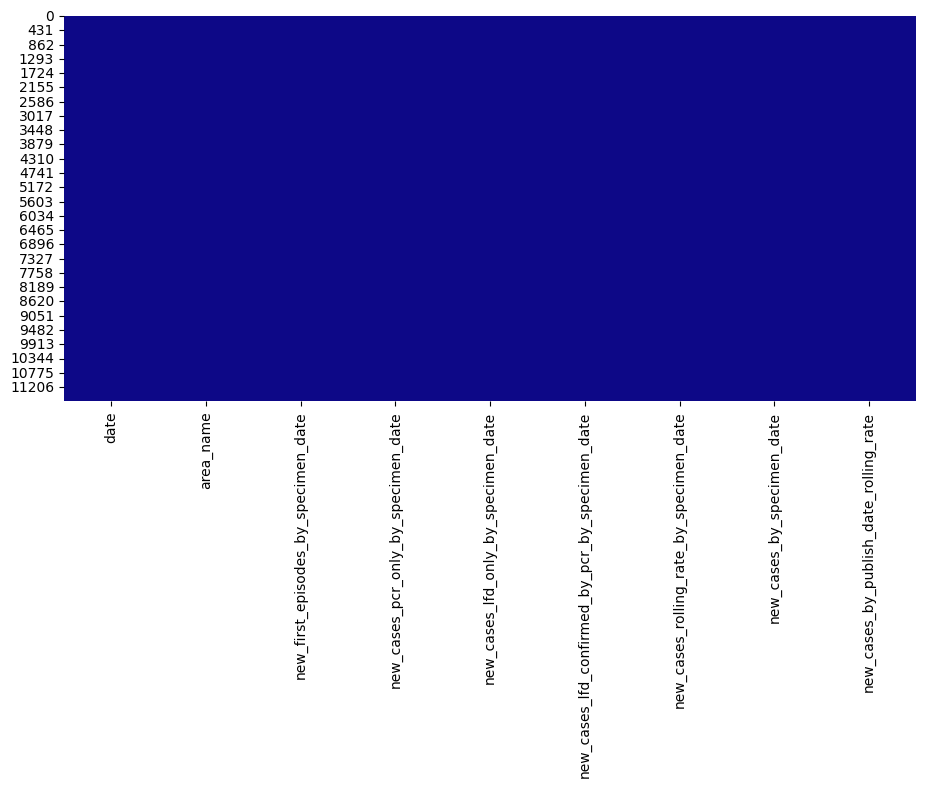

In [32]:
plt.figure(figsize=(11, 5))
sns.heatmap(merged_cases_dataframe.isnull(), cbar=False, cmap='plasma')

### This has appropriately filled the data

## 5. Handling Duplicates

### There are several duplicate rows which I have removed

In [33]:
print(merged_cases_dataframe.duplicated().sum())

0


In [34]:
merged_cases_dataframe = merged_cases_dataframe.drop_duplicates()


In [35]:
print(merged_cases_dataframe.duplicated().sum())

0



## 6. Data Type Conversion
### I will need to convert the date column to a datetime object to facilitate time series plots as you can see following my manipulation the column is a datetime object

In [36]:
merged_cases_dataframe.loc[:, 'date'] = pd.to_datetime(merged_cases_dataframe['date'], errors='coerce')

In [37]:
merged_cases_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11628 entries, 0 to 11627
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   date                                             11628 non-null  object 
 1   area_name                                        11628 non-null  object 
 2   new_first_episodes_by_specimen_date              11628 non-null  float64
 3   new_cases_pcr_only_by_specimen_date              11628 non-null  float64
 4   new_cases_lfd_only_by_specimen_date              11628 non-null  float64
 5   new_cases_lfd_confirmed_by_pcr_by_specimen_date  11628 non-null  float64
 6   new_cases_rolling_rate_by_specimen_date          11628 non-null  float64
 7   new_cases_by_specimen_date                       11628 non-null  float64
 8   new_cases_by_publish_date_rolling_rate           11628 non-null  float64
dtypes: float64(7), object(2)
memo

## 7. Handling Outliers
### I first of all get a list of numerical columns and plot a box plot for each using seaborn to visually inspect for outliers

In [38]:
numerical_columns = merged_cases_dataframe.select_dtypes(include=['number']).columns.tolist()

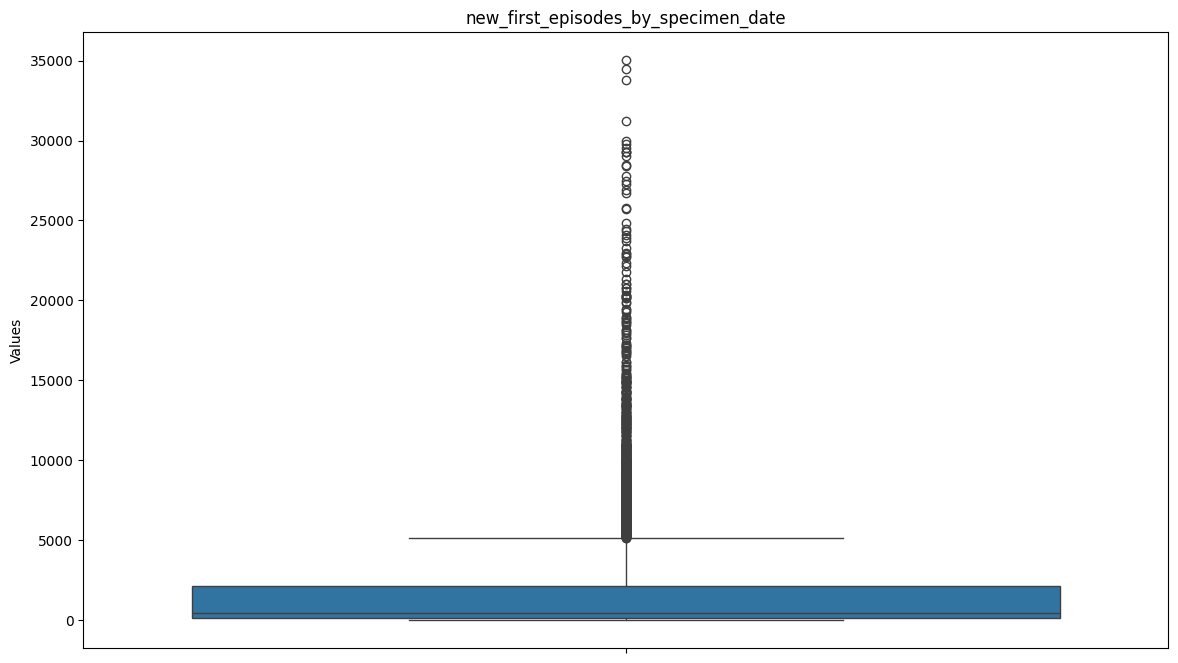

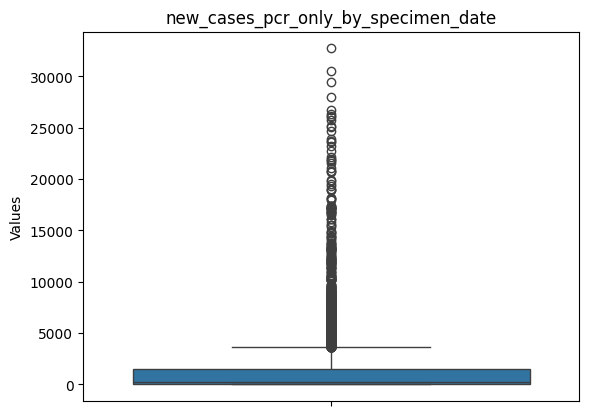

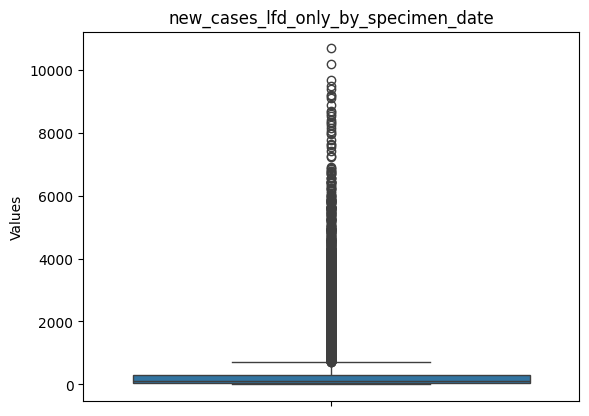

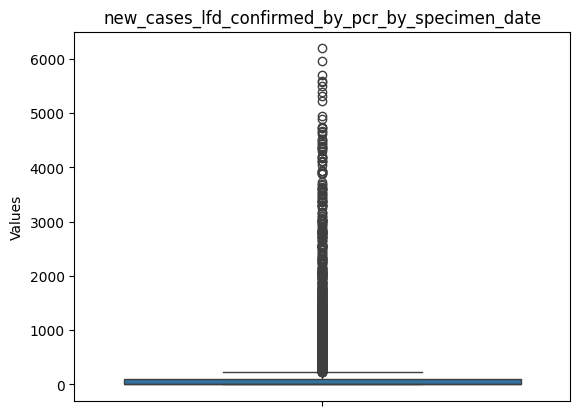

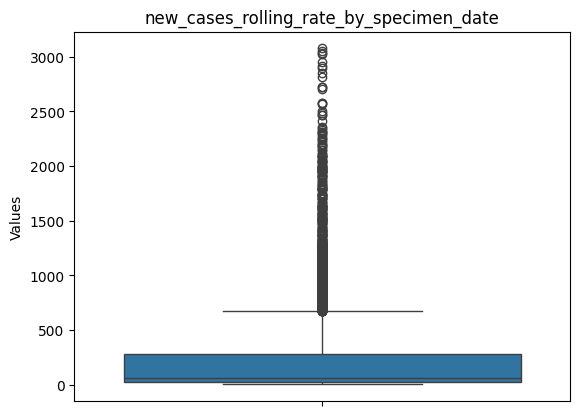

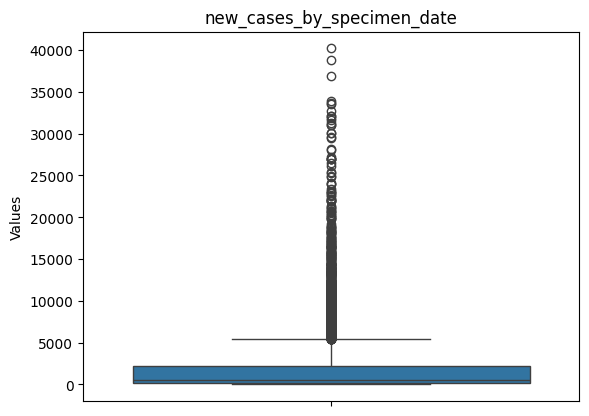

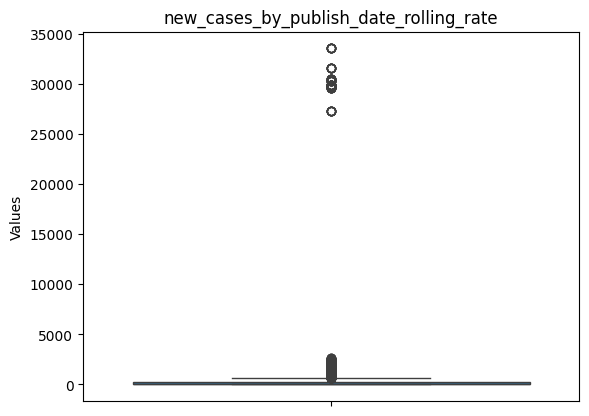

In [39]:
plt.figure(figsize=(14, 8))

for column in numerical_columns:
    sns.boxplot(merged_cases_dataframe[column])
    
    plt.title(f"{column}")
    plt.ylabel("Values")
    
    plt.xticks(rotation=90)
    plt.show()

### Outliers in the dataset will be retained, as they are inherent to pandemic-related data, reflecting unusual spikes or drops in cases. These outliers are crucial for understanding the full scope of the time series and capturing key events or trends during the pandemic.

## 9. Standardizing or Normalizing Data


In [40]:
merged_cases_dataframe.loc[:, 'area_name'] = merged_cases_dataframe['area_name'].str.strip().str.lower().str.replace(' ', '_')

In [41]:
merged_cases_dataframe

,date,area_name,new_first_episodes_by_specimen_date,new_cases_pcr_only_by_specimen_date,new_cases_lfd_only_by_specimen_date,new_cases_lfd_confirmed_by_pcr_by_specimen_date,new_cases_rolling_rate_by_specimen_date,new_cases_by_specimen_date,new_cases_by_publish_date_rolling_rate
0,2020-06-01 00:00:00,north_east,69.0,69.0,0.0,0.0,18.7,69.0,11.6
1,2020-06-01 00:00:00,north_west,266.0,266.0,0.0,0.0,26.5,266.0,9.7
2,2020-06-01 00:00:00,yorkshire_and_the_humber,191.0,191.0,0.0,0.0,27.0,191.0,7.8
3,2020-06-01 00:00:00,east_midlands,218.0,218.0,0.0,0.0,25.2,218.0,6.2
4,2020-06-01 00:00:00,west_midlands,123.0,123.0,0.0,0.0,16.3,123.0,5.2
...,...,...,...,...,...,...,...,...,...
11623,2023-12-14 00:00:00,west_midlands,30.0,0.0,0.0,0.0,10.4,60.0,10.0
11624,2023-12-14 00:00:00,east_of_england,30.0,0.0,0.0,0.0,10.4,60.0,12.7
11625,2023-12-14 00:00:00,london,30.0,0.0,0.0,0.0,10.4,60.0,11.4
11626,2023-12-14 00:00:00,south_east,30.0,0.0,0.0,0.0,10.4,60.0,13.4


## 10. Final Review and Summary

In [42]:
# Check for missing values after cleaning
merged_cases_dataframe.isnull().sum()

date                                               0
area_name                                          0
new_first_episodes_by_specimen_date                0
new_cases_pcr_only_by_specimen_date                0
new_cases_lfd_only_by_specimen_date                0
new_cases_lfd_confirmed_by_pcr_by_specimen_date    0
new_cases_rolling_rate_by_specimen_date            0
new_cases_by_specimen_date                         0
new_cases_by_publish_date_rolling_rate             0
dtype: int64

In [43]:
# Verify the data types again
merged_cases_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11628 entries, 0 to 11627
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   date                                             11628 non-null  object 
 1   area_name                                        11628 non-null  object 
 2   new_first_episodes_by_specimen_date              11628 non-null  float64
 3   new_cases_pcr_only_by_specimen_date              11628 non-null  float64
 4   new_cases_lfd_only_by_specimen_date              11628 non-null  float64
 5   new_cases_lfd_confirmed_by_pcr_by_specimen_date  11628 non-null  float64
 6   new_cases_rolling_rate_by_specimen_date          11628 non-null  float64
 7   new_cases_by_specimen_date                       11628 non-null  float64
 8   new_cases_by_publish_date_rolling_rate           11628 non-null  float64
dtypes: float64(7), object(2)
memo

## 11. Saving Cleaned Data

In [44]:
# Save the cleaned data to a new CSV file
merged_cases_dataframe.to_csv(r'../6_cleaned_files/ukhsa_cases_data/ukhsa_cases_data_cleaned.csv', index=False)